# Basic Plotting Function

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [39]:
filename = f"../results/ppo/testing/metrics.json"
with open(filename, "r") as f:
    raw_data = json.load(f)

def build_dataframe(data): #TODO: add keys
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        n = int(n)
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0], 
            "mean_episode_length": data[key]["mean_episode_length"][0], 
            "steps_per_second": data[key]["steps_per_second"][0]}
        records[n] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    return df

seed = 'seed_42'
cartpole_data = build_dataframe(raw_data["CartPole-v1"]['PPO'][seed])
acrobot_data = build_dataframe(raw_data["Acrobot-v1"]['PPO'][seed])
minatar_data = build_dataframe(raw_data["SpaceInvaders-MinAtar"]['PPO'][seed])

<Axes: title={'center': 'SpaceInvaders-MinAtar'}>

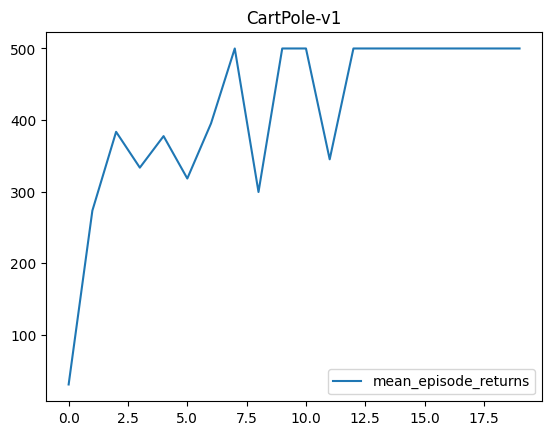

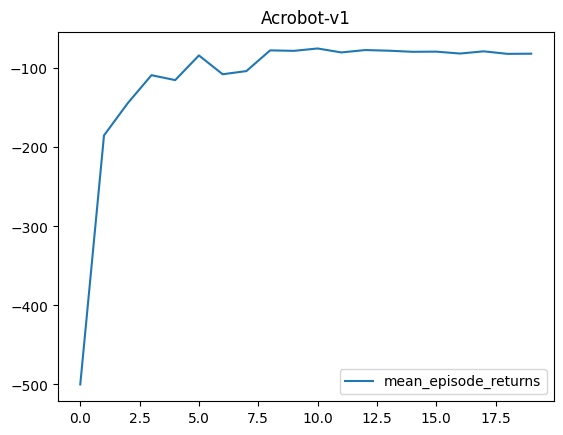

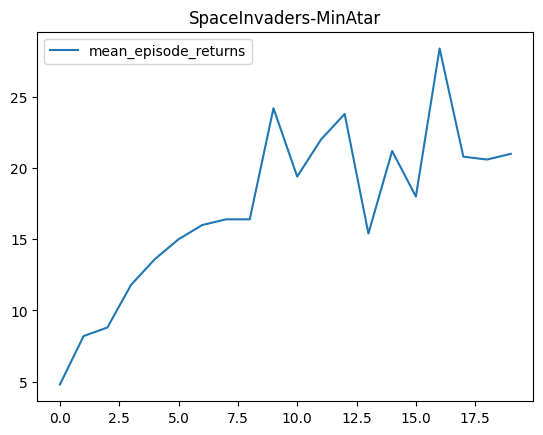

In [40]:
# Plot training

cartpole_data.plot(y="mean_episode_returns", title="CartPole-v1")

acrobot_data.plot(y="mean_episode_returns", title="Acrobot-v1")

minatar_data.plot(y="mean_episode_returns", title="SpaceInvaders-MinAtar")

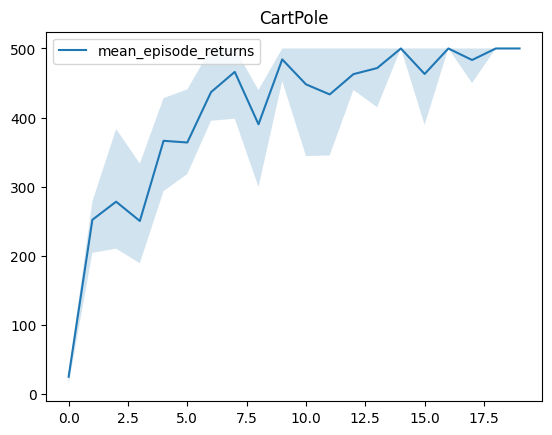

In [37]:
seed_list = [41, 42, 43]

dfs = []
for seed in seed_list:
    seed = f"seed_{seed}"
    # dfs.append(build_dataframe(raw_data["SpaceInvaders-MinAtar"]['PPO'][seed]))
    dfs.append(build_dataframe(raw_data["CartPole-v1"]['PPO'][seed]))

df_concat = pd.concat(dfs)
by_row_index = df_concat.groupby(df_concat.index)
df_mean = by_row_index.mean()
df_std = by_row_index.std()
ax = df_mean.plot(y="mean_episode_returns", title="CartPole")
# for i in range(3):
#     plt.plot(df_mean.index, dfs[i].mean_episode_returns, color='red')

# small = df_mean.mean_episode_returns - df_std.mean_episode_returns
# large = df_mean.mean_episode_returns + df_std.mean_episode_returns
small = by_row_index.min().mean_episode_returns
large = by_row_index.max().mean_episode_returns
plt.fill_between(df_mean.index, small, large, alpha=0.2)
